In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
data = sns.load_dataset("iris")

In [3]:
display(data)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Variable distribution


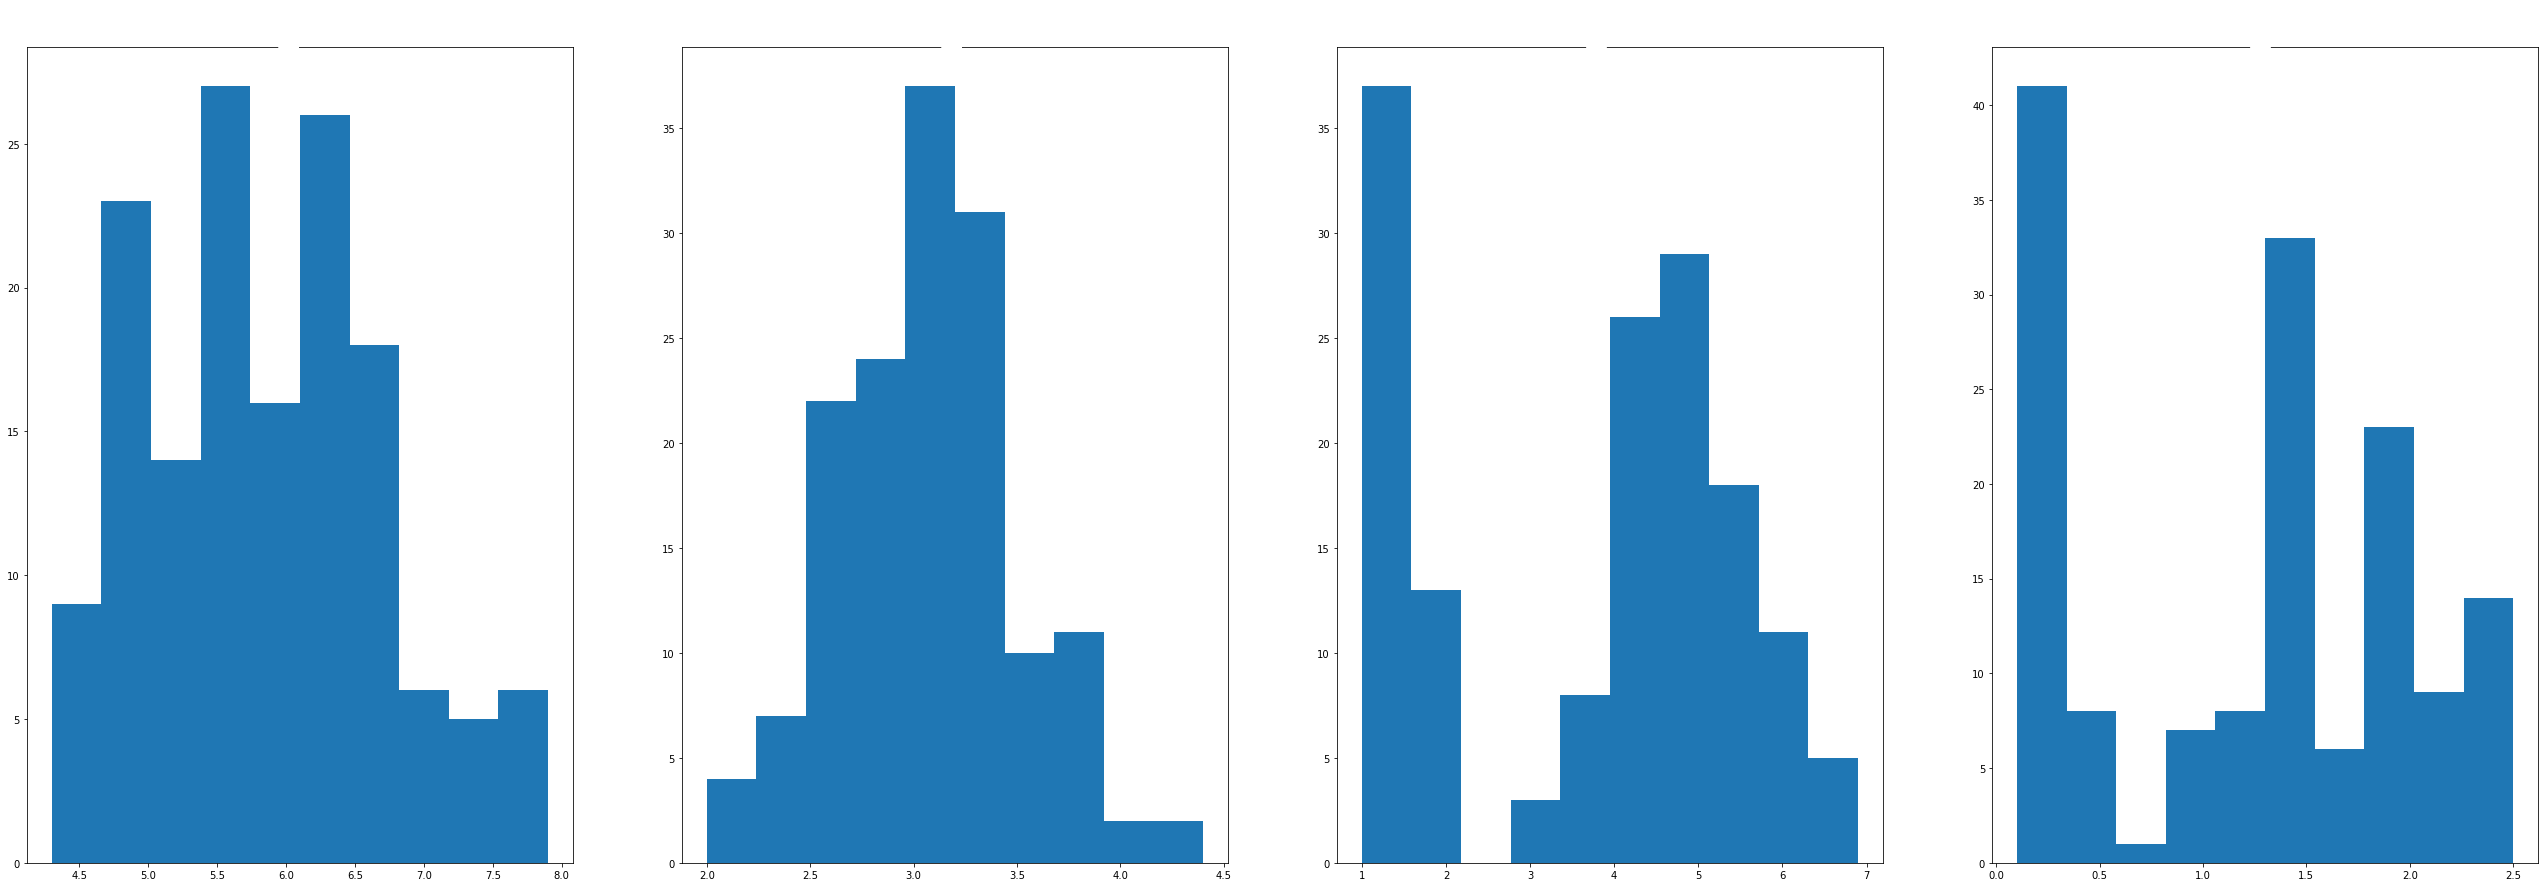

In [4]:
val = data.columns.to_list()

plt.figure(figsize=(45,15))
for i in range(0,4):
    plt.subplot(1,4,i+1)
    plt.hist(data.iloc[:,i])
    plt.title("{}".format(val[i]),fontsize=40,color="white")
print("Variable distribution")

In [5]:
null_value = data.isnull().sum().to_frame(name="Null Value")
null_value

,Null Value
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [6]:
def encode(x):
    if "setosa" in x:
        return 0
    elif "versicolor" in x:
        return 1
    else:
        return 2

In [7]:
species_encoded = data.species.apply(lambda x : encode(x)).to_frame(name="species_encoded")
process = pd.concat([data,species_encoded],axis=1)
processed_data = process.drop(columns=["species"])
display(processed_data)

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [129]:
scaler = MinMaxScaler()

X = processed_data.iloc[:,:-1]



y = processed_data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

display(X)
display(y)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_encoded, Length: 150, dtype: int64

In [130]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
model1_pred = model1.predict(X_test)
Accuracy1 = accuracy_score(y_test,model1_pred)


print("DecisionTreeClassifier accuracy score : {}".format(Accuracy1))

DecisionTreeClassifier accuracy score : 1.0


In [122]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

In [131]:
cluster1 = KMeans(n_clusters=3)
cluster1_pred = cluster1.fit_predict(X)

score1 = adjusted_rand_score(y,cluster1_pred)
print("Rand score of KMeans : {}".format(score1))

Rand score of KMeans : 0.7302382722834697


In [125]:
cluster2 = DBSCAN(eps = 1.5, min_samples=50)
cluster2_pred = cluster2.fit_predict(X)
score2 = adjusted_rand_score(y,cluster2_pred)
print("Rand score of DBSCAN : {}".format(score2))

Rand score of DBSCAN : 0.0


In [132]:
cluster3 = AgglomerativeClustering(n_clusters=3,linkage="average")
cluster3_pred = cluster3.fit_predict(X)
score3 = adjusted_rand_score(y,cluster3_pred)
print("Rand score od AgglomerativeClustering : {}".format(score3))

Rand score od AgglomerativeClustering : 0.7591987071071522


In [108]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

linkage_matrix = linkage(X,"average")

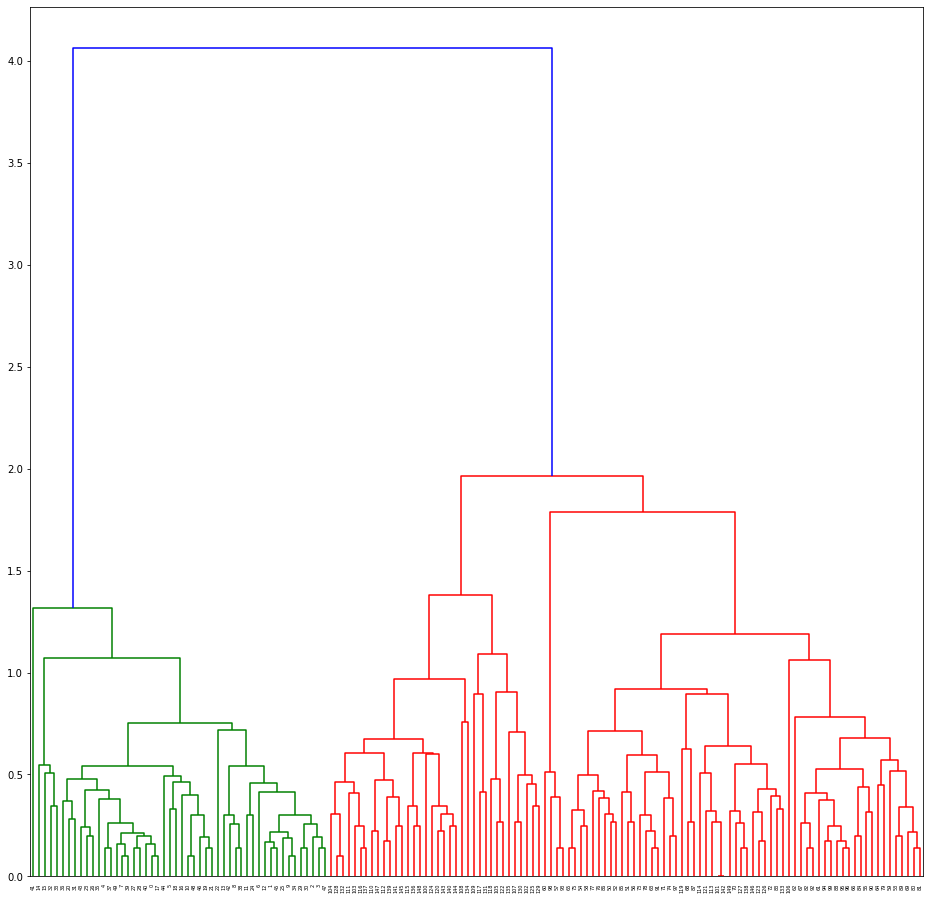

In [110]:
plt.figure(figsize=(16,16))

dendrogram(linkage_matrix)
plt.show()